# Support Vector Machines

초평면은 n 차원 공간에서 n-1 서브공간이다.

SVM은 학습데이터에서 클래스들 사이의 마진(margin)을 최대화 하는 초평면을 구하고,

데이터를 분류한다

## 실습01.  마진과 서프트 벡터 이해하기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn import svm   
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)] 

In [ ]:
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, 
       columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2]  
# 0, 1에 관삼 Iris-setosa and Iris-Versicolor
data.head()

In [ ]:
sns.lmplot(x='petal length',y='petal width',
           hue='target',data=data, fit_reg=False, legend=False)

plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [ ]:
svc = LinearSVC(C=1,loss="hinge")

svc.fit(data[['petal length','petal width']].values,data['target'].values)

In [ ]:
# 그림을 그리기 위한 파라미터 설정 
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]
x0 = np.linspace(-1.7, 0.7, num=100) 
x1_decision = -b/w1 - w0/w1*x0 # 결정경계
x1_plus = x1_decision + 1/w1   # +1 마진
x1_minus = x1_decision - 1/w1  # -1 마진 

In [ ]:
sns.lmplot(x='petal length',y='petal width',
           hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Setosa','Versicolor'], 
           fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('[C = 1]', fontsize = 16)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [ ]:
svc = LinearSVC(C=1000,loss="hinge") # C=10000
svc.fit(data[['petal length','petal width']].values,data['target'].values)

w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
x1_decision = -b/w1 - w0/w1*x0
x1_plus = x1_decision + 1/w1
x1_minus = x1_decision - 1/w1

In [ ]:
sns.lmplot(x='petal length',y='petal width',
           hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], 
           fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('[C = 1000]', fontsize = 20)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

## 실습02.  SVM IRIS 데이터에 적용

In [ ]:
iris_dataset = datasets.load_iris()

## Visualizing the relationship between sepal and target classes

In [ ]:
def visuvalize_sepal_data():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # 꽃받침 길이, 너비 
    y = iris.target
   
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Width & Length')
    plt.show()
 
visuvalize_sepal_data()

## Visualizing the relationship between Petal and target classes

In [ ]:
def visuvalize_petal_data():
    iris = datasets.load_iris()
    X = iris.data[:, 2:]  # 꽃잎(petal)
    y = iris.target
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Petal Width & Length')
    plt.show()
 
visuvalize_petal_data()

## SVM의 커널 사용 
#Modeling Different Kernel Svm classifier using Iris Sepal features

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # 꽃받침
y = iris.target
C = 1.0  

In [ ]:
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X, y)

In [ ]:
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X, y)

In [ ]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc.fit(X, y)

In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C)
poly_svc.fit(X, y)

## Visualizing the modeled svm classifiers with Iris Sepal features

In [ ]:
h = .02  # step size in the mesh 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
titles = ['SVC with linear kernel','LinearSVC (linear kernel)',
        'SVC with RBF kernel','SVC with polynomial (degree 3) kernel'] 
plt.figure(figsize=(16,16))        

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
     # Plot the decision boundary. For that, we will assign a color to each
     # point in the mesh [x_min, x_max]x[y_min, y_max].
     plt.subplot(2, 2, i + 1)
     plt.subplots_adjust(wspace=0.4, hspace=0.4) 
     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
     Z = Z.reshape(xx.shape)
     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
     plt.xlabel('Sepal length',fontsize = 20)
     plt.ylabel('Sepal width',fontsize = 20)
     plt.xlim(xx.min(), xx.max())
     plt.ylim(yy.min(), yy.max())
     plt.xticks(())
     plt.yticks(())
     plt.title(titles[i],fontsize = 26)
        
plt.show()

In [ ]:
predictions = lin_svc.predict(iris.data[:, :2])
accuracy_score(predictions, iris.target)

## Modeling Different Kernel Svm classifier using Iris Petal features

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target
C = 1.0  # SVM regularization parameter
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

## Visualizing the modeled svm classifiers with Iris Petal features


In [ ]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
      'LinearSVC (linear kernel)',
      'SVC with RBF kernel',
      'SVC with polynomial (degree 3) kernel']
 
plt.figure(figsize=(14,12))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.15)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length',fontsize = 18)
    plt.ylabel('Petal width',fontsize = 18)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i],fontsize = 18)
 
plt.show()

In [ ]:
predictions = lin_svc.predict(iris.data[:, 2:])

In [ ]:
accuracy_score(predictions, iris.target)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_svc, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## 실습 03. 비선형구분 SVM 예제

In [3]:
from sklearn.datasets import make_moons

X,y=make_moons(noise=0.1, random_state=2) 

data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


C:\Users\user\Anaconda3\envs\tf-cpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


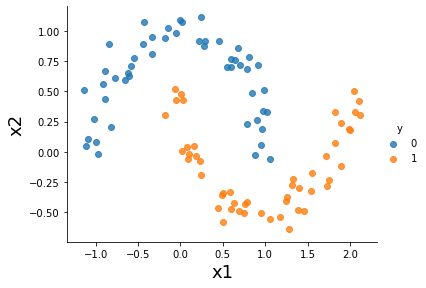

In [4]:
sns.lmplot(x='x1',y='x2',hue='y',data=data, 
           fit_reg=False, legend=True, size=4, aspect=4/3)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

In [5]:
# tranform the features, here we use a 3rd degree polynomials
print('Shape of X before tranformation:', X.shape)
poly = PolynomialFeatures(degree = 3, include_bias=False)
Xpoly = poly.fit_transform(X)
print('Shape of X aftere tranformation:', Xpoly.shape)

Shape of X before tranformation: (100, 2)
Shape of X aftere tranformation: (100, 9)


In [6]:
scaler = StandardScaler()
Xpolystan = scaler.fit_transform(Xpoly)

svm_clf = LinearSVC(C=10,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)
print(svm_clf.intercept_, svm_clf.coef_)

[0.14736736] [[-1.48196342 -0.38934263 -3.63175128 -0.24403671  0.84162638  6.2076445
  -0.98199026  0.70829665 -1.94867363]]


In [7]:
# preparing to plot decision boundary of the classifier
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    return xx, yy

In [8]:
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# polynomial transformation and standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridpoly = poly.transform(xgrid)
xgridpolystan = scaler.transform(xgridpoly)
# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

C:\Users\user\Anaconda3\envs\tf-cpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


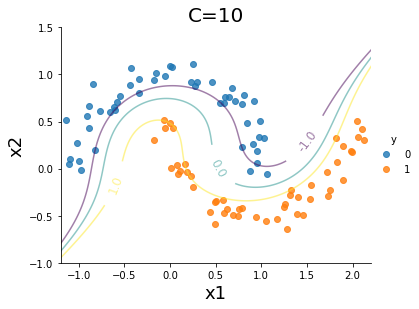

In [9]:
# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, 
           fit_reg=False, legend=True, size=4, aspect=4/3)

CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])

#plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', 
plt.clabel(CS, inline=1,fmt='%1.1f', 
           fontsize=12, manual=[(1.5,0.3),(0.5,0.0),(-0.5,-0.2)])

#
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=10', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

C:\Users\user\Anaconda3\envs\tf-cpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


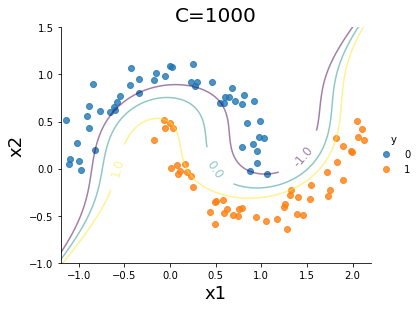

In [10]:
svm_clf = LinearSVC(C=1000,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)

# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])

plt.clabel(CS, inline=1,
           #levels=[-1.0,0,1.0], 
           fmt='%1.1f', fontsize=12, manual=[(1.5,0.1),(0.5,0.0),(-0.5,0.0)])
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

C:\Users\user\Anaconda3\envs\tf-cpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


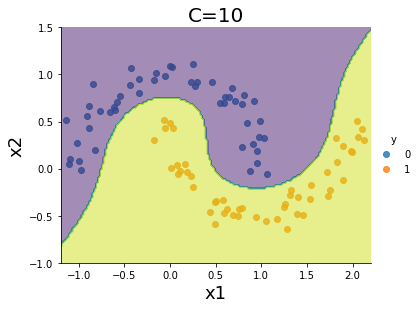

In [11]:
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='poly', degree=3, C=10, coef0=1)
svm_clf.fit(Xstan,y)

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=10', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()